# Visualize Jona's beams

Apparently I don't understand Jonas's beam enough to make sense of his outputs...

In section 2 I use David's interpretation of the beam and plot stuff.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
beam_0_7 = np.loadtxt(
    '/fastpool/yuping/jonas-beams/farfield_source_f=0.70_1_foD_0p315_ThetaPhi0.1deg.ffs',
skiprows=31, dtype={'names': ('phi', 'theta', 're_e_theta', 'im_e_theta', 're_e_phi', 'im_e_phi'),
                   'formats': ['f'] * 6})

In [10]:
beam_0_7['im_e_phi'][0]

0.057920363

(1.0, 60.0)

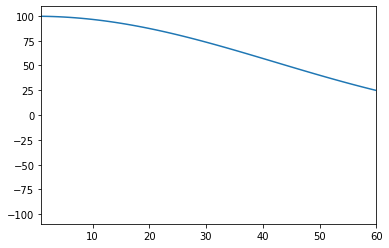

In [14]:
plt.plot(beam_0_7['re_e_theta'])
plt.xlim([1,60])

phi is azimuthal angle and theta the other angle. Theta varies first in the data.

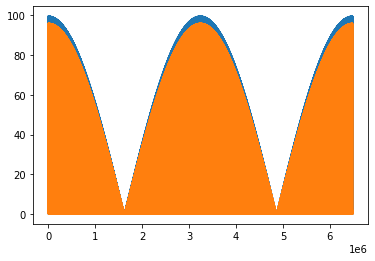

In [26]:
plt.plot(np.abs(beam_0_7['re_e_theta']), label='re_e_theta')
plt.plot(np.abs(beam_0_7['im_e_theta']), label='im_e_theta')

In [28]:
beam_0_7[1500000]

(83.2, 156.8, 0.02777795, -0.00358521, 0.15281165, -0.20650217)

In [37]:
beam_0_7[4862700]

(270., 0., 0.07252419, -0.05792036, 99.62479, 96.0299)

In [40]:
beam_0_7[1620900]

(90., 0., -0.07252419, 0.05792036, -99.62479, -96.0299)

In [36]:
np.argmax(beam_0_7['re_e_phi'])

4862700

In [38]:
np.argmin(beam_0_7['re_e_phi'])

1620900

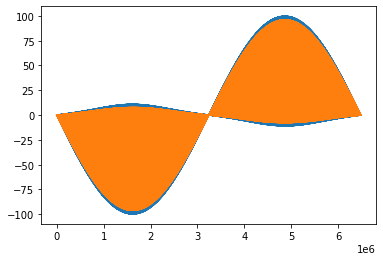

In [43]:
plt.plot(beam_0_7['re_e_phi'])
plt.plot(beam_0_7['im_e_phi'])

near phi=90 and 270 degrees, the phi component gets big. Near phi=0 and 180, the theta component is big. I think the E vector points in the polarization direction.

(0.0, 200.0)

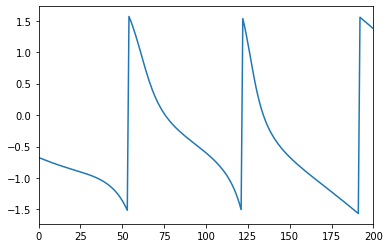

In [54]:
plt.plot(np.arctan(beam_0_7['im_e_phi']/beam_0_7['re_e_phi']))
plt.xlim([0, 200])

(0.0, 200.0)

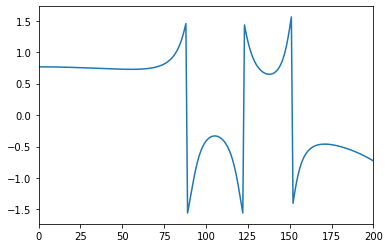

In [55]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0, 200])

Try to recover the X (or Y) component...

(0.0, 10000.0)

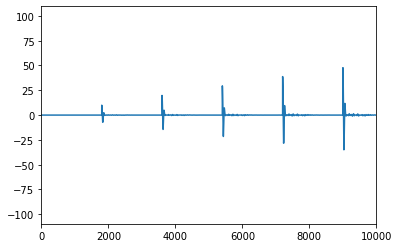

In [65]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']))
plt.xlim([0,10000])

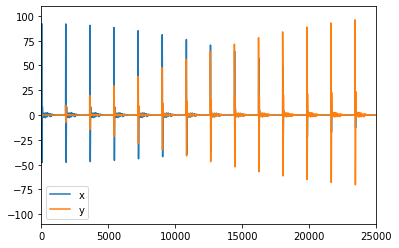

In [71]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.sin(beam_0_7['theta'])
         * np.cos(beam_0_7['phi']), label='x')
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']), label='y')
plt.xlim([0,25000])
plt.legend()

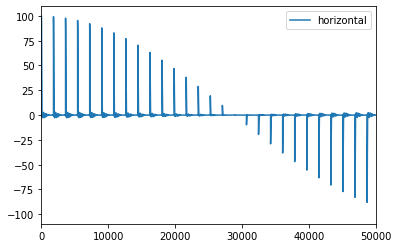

In [76]:
plt.plot(beam_0_7['re_e_theta']*np.cos(beam_0_7['phi']) -
         np.sin(beam_0_7['phi'])*beam_0_7['re_e_phi'], label='horizontal')
plt.xlim([0,50000])
plt.legend()

(0.0, 200.0)

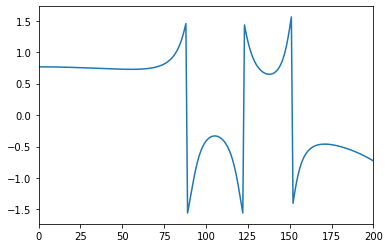

In [95]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0,200])

## Try to do a 2D thing

In [106]:
x = beam_0_7['theta'] * np.cos(beam_0_7['phi'])
y = beam_0_7['theta'] * np.sin(beam_0_7['phi'])

In [100]:
beam_0_7 = beam_0_7.reshape((3601, 1801))

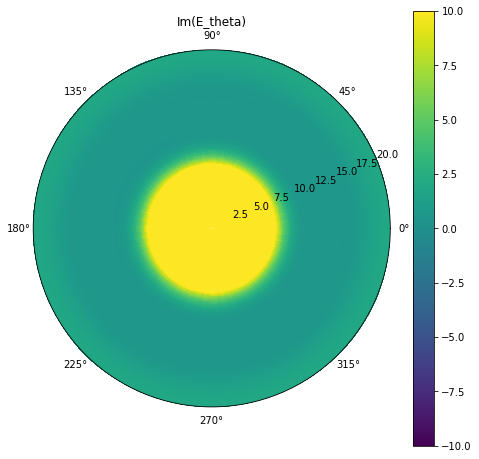

In [146]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_theta'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

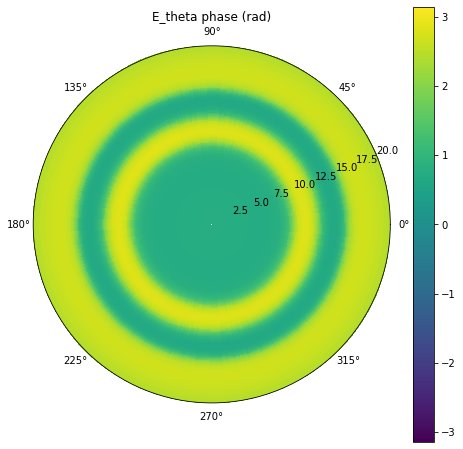

In [151]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest')
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,20)
fig.colorbar(p)

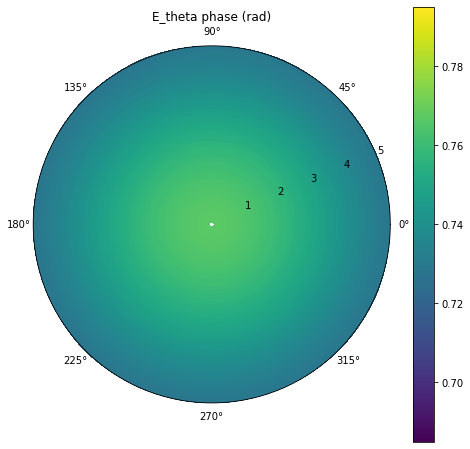

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest',vmin=3.14/4-0.1, vmax=3.14/4+0.01)
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,5)
fig.colorbar(p)

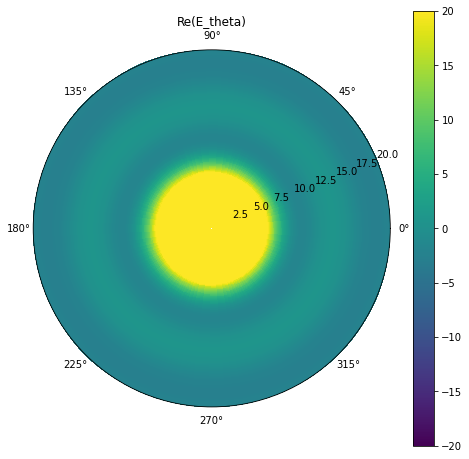

In [149]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_theta'],
                  shading='nearest', vmin=-20, vmax=20)
ax.set_title('Re(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

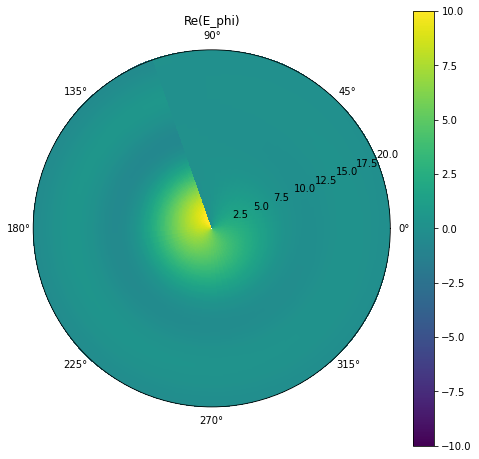

In [160]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_rlim(0,20)
ax.set_title('Re(E_phi)')
fig.colorbar(p)

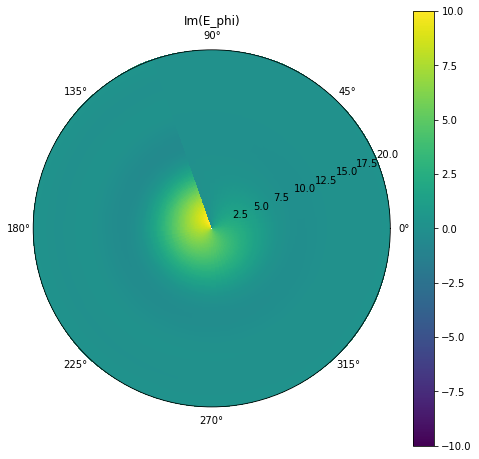

In [161]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_phi)')
ax.set_rlim(0,20)
fig.colorbar(p)

# Take two

In [2]:
beam_2_0_data = np.loadtxt(
    '/fastpool/yuping/jonas-beams/Jonas_f=2.00.csv', delimiter=',',
skiprows=1, dtype={'names': ('phi', 'theta', 'Xamp', 'Xph', 'Yamp', 'Yph'),
                   'formats': ['f'] * 6})

In [51]:
cut = beam_2_0_data['phi'] == 0.
phi_cut = beam_2_0_data['phi'][cut]
theta_cut = beam_2_0_data['theta'][cut]
pow_cut = beam_2_0_data['Xamp'][cut]**2

In [47]:
cut2 = beam_2_0_data['phi'] == 45.

In [48]:
beam_2_0_data['theta'][cut2]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ],
      dtype=float32)

In [55]:
np.argmin(np.abs(beam_2_0_data['Xamp'][cut2]**2 - 0.5))

10

In [56]:
beam_2_0_data['theta'][cut2][10]

1.1

In [53]:
pow_cut

array([1.00000000e+00, 9.93783057e-01, 9.78268921e-01, 9.54059005e-01,
       9.21722293e-01, 8.82032335e-01, 8.35913479e-01, 7.84413815e-01,
       7.28689790e-01, 6.69946492e-01, 6.09403491e-01, 5.48268378e-01,
       4.87686843e-01, 4.28712934e-01, 3.72285903e-01, 3.19201767e-01,
       2.70098746e-01, 2.25446612e-01, 1.85546607e-01, 1.50534451e-01,
       1.20387055e-01, 9.49453264e-02, 7.39312470e-02, 5.69675490e-02,
       4.36112881e-02, 3.33759487e-02, 2.57545989e-02, 2.02492382e-02,
       1.63881220e-02, 1.37421619e-02, 1.19396541e-02, 1.06727676e-02,
       9.70132183e-03, 8.85126274e-03, 8.01023748e-03, 7.12026749e-03,
       6.16621645e-03, 5.16575528e-03, 4.15800372e-03, 3.19140684e-03,
       2.31518364e-03, 1.57162687e-03, 9.90136061e-04, 5.84759109e-04,
       3.53558920e-04, 2.79691245e-04, 3.34784912e-04, 4.83142125e-04,
       6.85850333e-04, 9.06001776e-04, 1.11257075e-03], dtype=float32)

In [52]:
np.argmin(np.abs(pow_cut-0.5))

12

In [43]:
theta_cut[12]

1.2

In [44]:
theta_cut[11]

1.1

In [45]:
theta_cut[13]

1.3

In [19]:
pow_cut[12]

0.48768684

In [20]:
pow_cut.max()

1.0

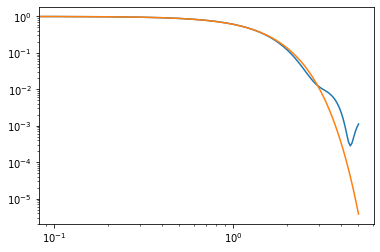

In [38]:
plt.plot(theta_cut, pow_cut)
plt.plot(theta_cut, np.exp(-theta_cut**2/ (2 * np.power(1.0001, 2.))))
plt.yscale('log')
plt.xscale('log')

In [9]:
beam_2_0_data['Xamp']

array([1.        , 0.9968867 , 0.996841  , ..., 0.03335178, 0.03334769,
       0.03335522], dtype=float32)

TypeError: Invalid shape (8373,) for image data

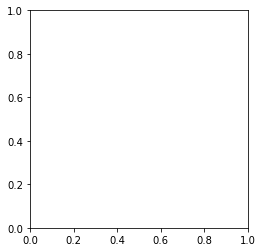

In [6]:
plt.imshow(beam_2_0_data['Xamp'])

In [187]:
beam_2_0 = beam_2_0_data['Xamp'] * np.exp(beam_2_0_data['Xph'] * 1j * np.pi/180)

In [ ]:
beam_2_0_data['Xph'].min()

-94.342064

In [ ]:
beam_2_0_data['Xph'].max()

107.46252

In [27]:
beam_2_0_data['phi'].max()

360.0

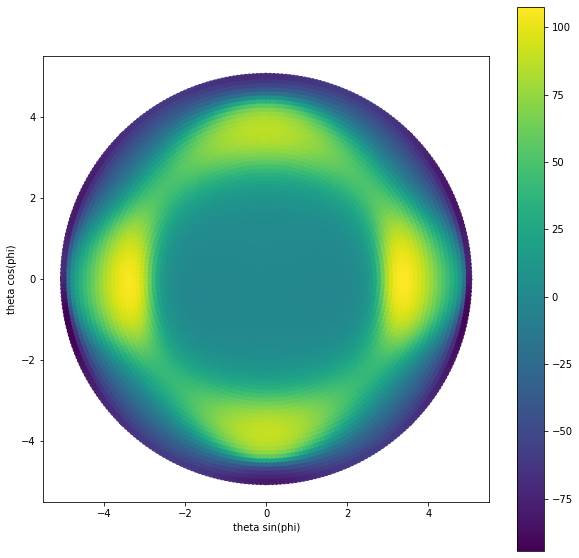

In [196]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=np.angle(beam_2_0, deg=True), s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

In [198]:
beam_2_0.real.min()

-0.013000528

<ipython-input-197-b7d4fd37589c>:4: RuntimeWarning: invalid value encountered in log
  c=np.log(beam_2_0.real), s=30)


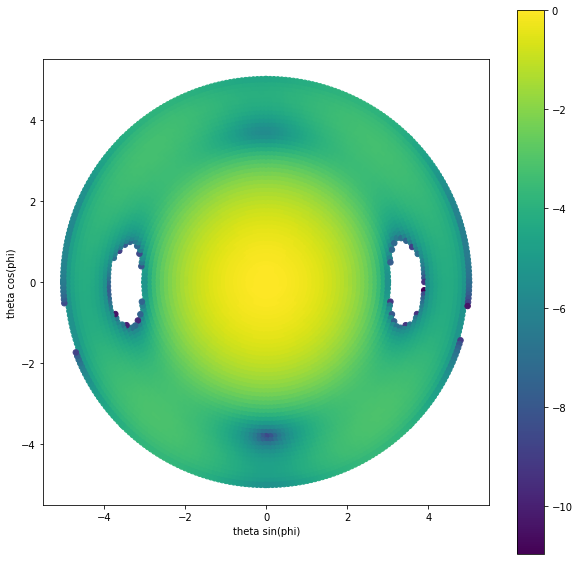

In [197]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=np.log(beam_2_0.real), s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

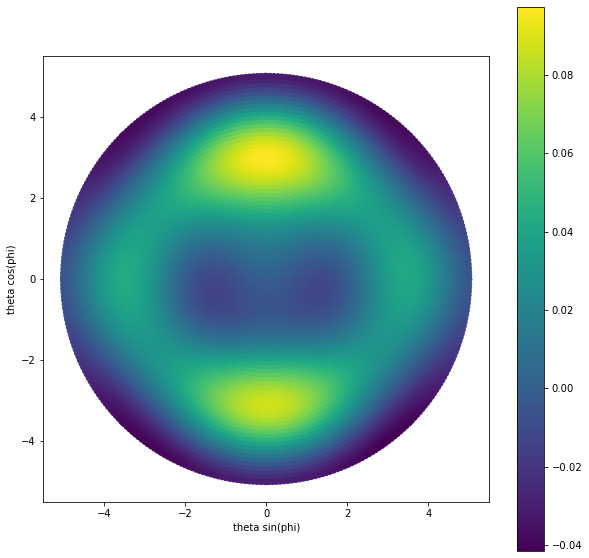

In [194]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=beam_2_0.imag, s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

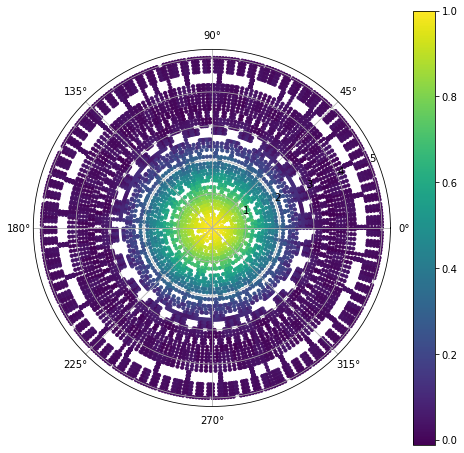

In [189]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=beam_2_0.real, s=10)
fig.colorbar(p)

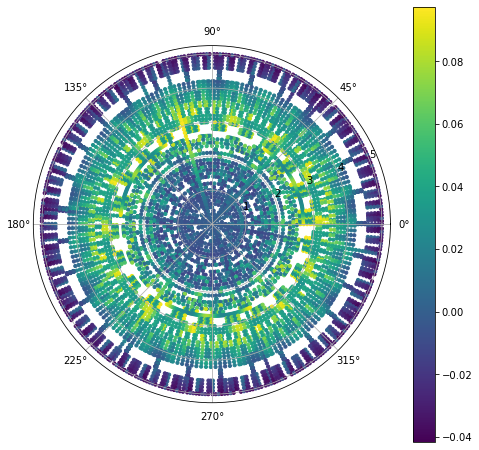

In [195]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=beam_2_0.imag, s=10)
fig.colorbar(p)

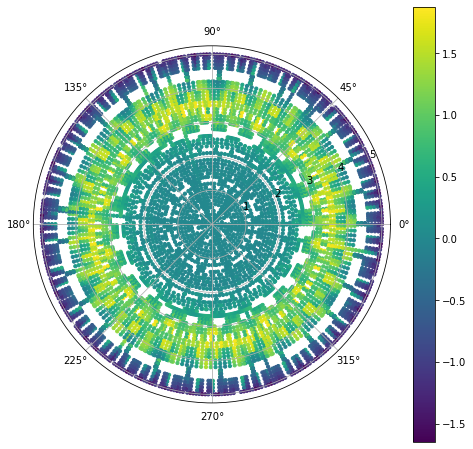

In [191]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=np.angle(beam_2_0), s=10)
fig.colorbar(p)

In [203]:
np.sin(5 * np.pi/180)

0.08715574274765817

In [249]:
from scipy.interpolate import griddata
l, m = np.mgrid[-0.09:0.09:1000j, -0.09:0.09:1000j]
beam_interp = griddata((np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.sin(beam_2_0_data['phi'] * np.pi / 180),
                        np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.cos(beam_2_0_data['phi'] * np.pi / 180)),
                        beam_2_0, (l, m))

In [250]:
ldata = np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.sin(beam_2_0_data['phi'] * np.pi / 180)
mdata = np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.cos(beam_2_0_data['phi'] * np.pi / 180)

([], <a list of 0 Text major ticklabel objects>)

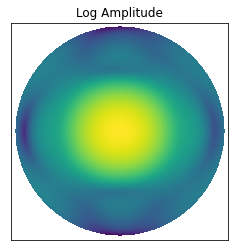

In [259]:
plt.imshow(np.log10(np.abs(beam_interp)))
plt.title('Log Amplitude')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

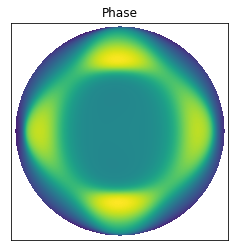

In [258]:
plt.imshow(np.angle((beam_interp)))
plt.title('Phase')
plt.xticks([])
plt.yticks([])

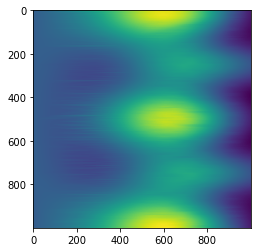

In [247]:
plt.imshow(beam_interp.imag)

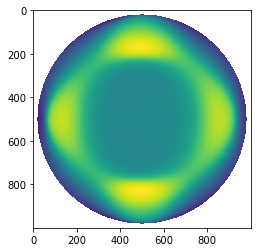

In [207]:
plt.imshow(np.angle(beam_interp))

plan: figure out offsets with pointing errors, and then interpolate in phi-theta space with 1/f scaling

In [215]:
from scipy.interpolate import griddata
pp, tt = np.mgrid[0:360:1000j, 0:5:1000j]
beam_interp = griddata((beam_2_0_data['theta'],
                        beam_2_0_data['phi']),
                        beam_2_0, (tt, pp))

Interpolating in l,m space seems to work a lot better. l and m should scale as 1/f since the offset angle scales as f.

In [234]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [235]:
offset_rad = 0.0757842814661876
pa_rad = 0.7866084500958195
from stuff import get_pointing_error
sep_deg, pa_deg = get_pointing_error(0.1/360, 2048)

In [241]:
ls.min(), ls.max()

(0.053593376367875284, 0.05360858046202351)

In [244]:
ms.min(), ms.max()

(0.05346411418893639, 0.05347852585529675)

In [242]:
ldata.min(), ldata.max()

(-0.087155744, 0.087155744)

In [245]:
mdata.min(), mdata.max()

(-0.087155744, 0.087155744)

In [246]:
thetas = offset_rad + sep_deg * np.pi / 180
phis = pa_rad + pa_deg * np.pi / 180

ls = np.sin(thetas) * np.sin(phis)
ms = np.sin(thetas) * np.cos(phis)
responses_real = interp2d(ldata, mdata, np.real(beam_2_0))(ls, ms)
responses_img = interp2d(ldata, mdata, np.imag(beam_2_0))(ls, ms)